<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   IPK                10 non-null     float64
 1   Jumlah_Absensi     10 non-null     int64  
 2   Waktu_Belajar_Jam  10 non-null     int64  
 3   Lulus              10 non-null     int64  
 4   Rasio_Absensi      10 non-null     float64
 5   IPK_x_Study        10 non-null     float64
dtypes: float64(3), int64(3)
memory usage: 608.0 bytes
None
   IPK  Jumlah_Absensi  Waktu_Belajar_Jam  Lulus  Rasio_Absensi  IPK_x_Study
0  3.8               3                 10      1       0.214286         38.0
1  2.5               8                  5      0       0.571429         12.5
2  3.4               4                  7      1       0.285714         23.8
3  2.1              12                  2      0       0.857143          4.2
4  3.9               2                 12      1       0.142857       

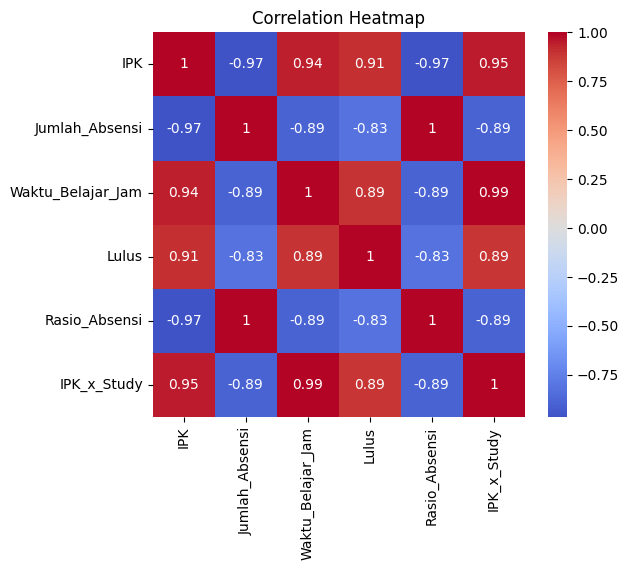

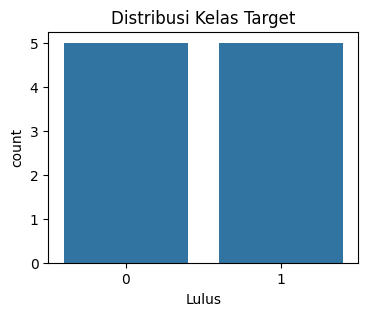

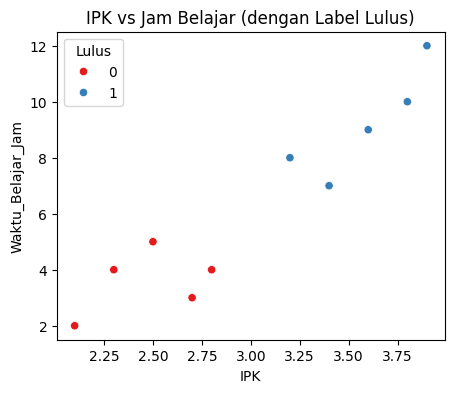

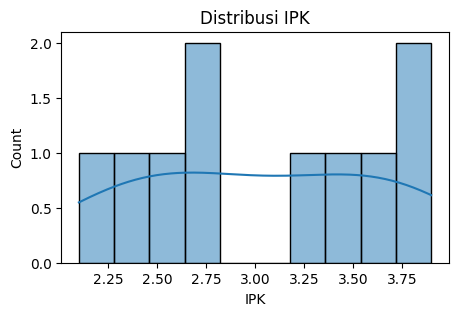

ValueError: The least populated class in y has only 1 member, which is too few. The minimum number of groups for any class cannot be less than 2.

In [1]:
# --- Import library utama ---
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# --- 1. Load dataset ---
df = pd.read_csv("processed_kelulusan.csv")  # pastikan nama file sesuai

# --- 2. Bikin fitur baru ---
df["Rasio_Absensi"] = df["Jumlah_Absensi"] / 14
df["IPK_x_Study"] = df["IPK"] * df["Waktu_Belajar_Jam"]

# --- 3. Cek data ---
print(df.info())
print(df.head())

# --- 4. Statistik deskriptif ---
print("\nStatistik deskriptif:")
print(df.describe())

# --- 5. Visualisasi (EDA) ---
plt.figure(figsize=(6,5))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", center=0)
plt.title("Correlation Heatmap")
plt.show()

# distribusi kelas target
plt.figure(figsize=(4,3))
sns.countplot(x="Lulus", data=df)
plt.title("Distribusi Kelas Target")
plt.show()

# scatterplot hubungan IPK - Jam Belajar
plt.figure(figsize=(5,4))
sns.scatterplot(x="IPK", y="Waktu_Belajar_Jam", hue="Lulus", data=df, palette="Set1")
plt.title("IPK vs Jam Belajar (dengan Label Lulus)")
plt.show()

# histogram IPK
plt.figure(figsize=(5,3))
sns.histplot(df["IPK"], bins=10, kde=True)
plt.title("Distribusi IPK")
plt.show()

# --- 6. Split dataset: Train, Validation, Test ---
X = df.drop("Lulus", axis=1)
y = df["Lulus"]

# pertama bagi Train + Temp
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)

# lalu bagi Temp jadi Validation + Test
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42
)

print("\nUkuran dataset:")
print("Train:", X_train.shape, " Validation:", X_val.shape, " Test:", X_test.shape)

# --- 7. Simpan dataset bersih ---
df.to_csv("processed_kelulusan.csv", index=False)
print("\nFile processed_kelulusan.csv berhasil dibuat!")
